<a href="https://colab.research.google.com/github/bs3537/DS-Unit-4-Sprint-2-Neural-Networks/blob/master/_BESTRESULT_Earlystopping_Copy_of_TPU_Minmaxscaler_Normalizer_Keras_DeepFFNN_Spacy_NLP_whiskey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


In [0]:
#USING VECTORIZATION BY SPACY NLP AND KERAS SEQUENTIAL NEURAL NETWORK FOR TRAINING ON TRAIN DATA AND MAKING PREDICTIONS
#DATASET: WHISKY RATINGS CLASSIFICATION FROM REVIEWS

In [0]:
import pandas as pd
train = pd.read_csv('https://raw.githubusercontent.com/bs3537/DS-Unit-4-Sprint-1-NLP/master/module3-document-classification/train.csv')

In [0]:
train.head(1)

,id,description,ratingCategory
0,1321,"\nSometimes, when whisky is batched, a few leftover barrels are returned to the warehouse. Canadian Club recently pulled and vatted several of these from the 1970s. Acetone, Granny Smith apples, and fresh-cut white cedar showcase this long age. Complex and spicy, yet reserved, this dram is ripe with strawberries, canned pears, cloves, pepper, and faint flowers, then slightly pulling oak tannins. Distinct, elegant, and remarkably vibrant, this ancient Canadian Club is anything but tired. (Australia only) A$133",1


In [0]:
train['text'] = train['description'].str.strip('\n')

In [0]:
train2 = train.drop(columns=['description', 'id'])

In [0]:
train3 = train2.rename(columns={"ratingCategory": "label"})

In [0]:
train3['text'] = train3['text'].str.lower()

In [0]:
train3.head(1)

,label,text
0,1,"sometimes, when whisky is batched, a few leftover barrels are returned to the warehouse. canadian club recently pulled and vatted several of these from the 1970s. acetone, granny smith apples, and fresh-cut white cedar showcase this long age. complex and spicy, yet reserved, this dram is ripe with strawberries, canned pears, cloves, pepper, and faint flowers, then slightly pulling oak tannins. distinct, elegant, and remarkably vibrant, this ancient canadian club is anything but tired. (australia only) a$133"


In [0]:
from sklearn.model_selection import train_test_split

df_trn, df_val = train_test_split(train3, stratify = train3['label'], test_size = 0.20, random_state=42)

df_trn.shape, df_val.shape

((3269, 2), (818, 2))

In [0]:
#Vectorize text using spacy
pip install -U spacy[cuda92]


Requirement already up-to-date: spacy[cuda92] in /usr/local/lib/python3.6/dist-packages (2.2.4)


In [0]:
!python3 -m spacy download en_core_web_lg

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [0]:
import spacy
spacy.prefer_gpu()
nlp = spacy.load('en_core_web_lg')

In [0]:
doc = nlp("NLP is awesome!")

In [0]:
def get_word_vectors(docs):
    return [nlp(doc).vector for doc in docs]

In [0]:
#Train data
X = df_trn['text']
y_train = df_trn['label']
X_train_spacy = get_word_vectors(X)

In [0]:
X_train = np.array(X_train_spacy)

In [0]:
#Val. data

X_val = df_val['text']
y_val = df_val['label']
X_val_spacy = get_word_vectors(X_val)

In [0]:
X_val = np.array(X_val_spacy)

In [0]:
#Preprocessing data with Standard Scaling and Normalization

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_val_scaled = scaler.transform(X_val)

In [0]:
X_train_scaled.shape, X_val_scaled.shape

((3269, 300), (818, 300))

In [0]:
#Normalization

from sklearn.preprocessing import Normalizer

norm = Normalizer()

X_train_norm = norm.fit_transform(X_train_scaled)

X_val_norm = norm.transform(X_val_scaled)

In [0]:
X_train_norm.shape

(3269, 300)

In [0]:
X_val_norm.shape

(818, 300)

In [0]:
#Processing y train and y val
import tensorflow
num_classes = 3
#y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
#y_val = tensorflow.keras.utils.to_categorical(y_val, num_classes)

In [0]:
#Keras model

In [0]:
#for tensorflow 2.0, use tensorflow.keras rather than keras

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [0]:
model = Sequential()

In [0]:
#There are 3 categories in the label

In [0]:
#Stacking layers on model

#Keras Deep Feed Forward Neural Network

model.add(Dense(128, activation='relu', input_dim=(300)))
model.add(Dropout(0.2)) #Dropout is a regularization technique in Keras, prevents overfitting, use 0.5 for bigger models

model.add(Dense(64, activation='relu')) #half the number of nodes in progressive hidden layers
model.add(Dropout(0.2)) 

model.add(Dense(32, activation='relu')) #half the number of nodes in progressive hidden layers
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax')) #if no one hot encoding, output later nodes = labels +1 and use sparse categorical cross entropy

#use sigmoid rather than softmax activation for binary classification, for multiclass classification, use softmax.

In [0]:
#compile the model

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1)

In [0]:

model.compile(loss='sparse_categorical_crossentropy', optimizer= 'adam', metrics=['accuracy']) 

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               38528     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 9

In [0]:
history = model.fit(X_train_norm, y_train, epochs=1000, verbose=2, validation_data=(X_val_norm, y_val), callbacks=[es]) 

#start with 100-200 epochs then tune after viewing the losses and accuracy plot
#increasing batch size may increase accuracy

Epoch 1/1000
103/103 - 0s - loss: 0.4832 - accuracy: 0.7828 - val_loss: 0.5685 - val_accuracy: 0.7653
Epoch 2/1000
103/103 - 0s - loss: 0.4873 - accuracy: 0.7745 - val_loss: 0.5560 - val_accuracy: 0.7738
Epoch 3/1000
103/103 - 0s - loss: 0.4848 - accuracy: 0.7871 - val_loss: 0.5806 - val_accuracy: 0.7531
Epoch 00003: early stopping


In [0]:
#Hypertune by learning rate, no of epochs, batch size etc.


In [0]:
#Visualizing results

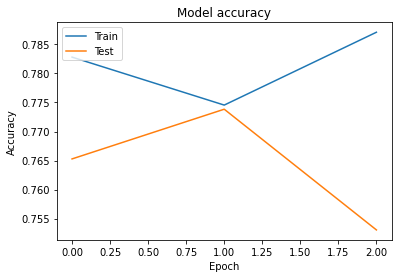

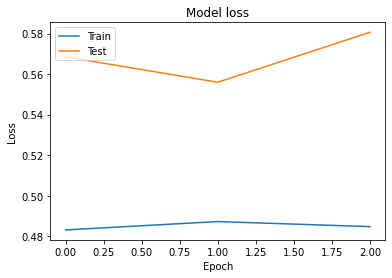

In [0]:
import matplotlib.pyplot as plt


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

In [0]:
#Higher validation accuracy and faster training (less epochs needed) using TPU vs. GPU.

In [0]:
#Reducing volatile visualization = increase val. data size, decrease learning rate, optimize (increase ) no of layers in dense layers, increase batch size. 

In [0]:
#Predicting on a randomly writtern review

data = {'text' : ["This whiskey is bad. I don't like it it's taste and smell. It is horrible."]}


In [0]:
test = pd.DataFrame(data = data)

In [0]:
test.head()

,text
0,This whiskey is bad. I don't like it it's taste and smell. It is horrible.


In [0]:
#vectorize using spacy

X_test = get_word_vectors(test['text'])

In [0]:
X_test_scaled = scaler.transform(X_test)

X_test_norm = norm.transform(X_test_scaled)


y_pred = model.predict(X_test_norm)

In [0]:
y_pred

array([[0.5757625 , 0.01723643, 0.4070011 ]], dtype=float32)

In [0]:
#Need to find why there are 4 predictions and how to interpret it. 

#Likely, the above output is the probabilities for the three classes.